TensorFlow 嘗試在已經初始化的 GPU 設備上進行修改，這是不可行的。要解決這個問題，你需要在 TensorFlow 任務開始之前進行所有 GPU 設備的配置。

tf環境重置 code

In [1]:
import os
import sys
import gc
import tensorflow as tf

def reset_tensorflow_environment():
    """
    全面重置 TensorFlow 環境並清理 GPU 資源
    """
    print("開始重置 TensorFlow 環境...")

    # 1. 關閉所有會話
    try:
        tf.keras.backend.clear_session()
    except Exception as e:
        print(f"清除會話時出錯: {e}")

    # 2. 釋放 Python 記憶體
    gc.collect()

    # 3. 重置 GPU 配置
    try:
        # 清除所有 GPU 設備
        tf.config.experimental.reset_memory_stats('GPU')
        
        # 刪除所有 GPU 設備
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        
        print("GPU 環境已重置")
    except Exception as e:
        print(f"GPU 重置時出錯: {e}")

    # 4. 設置環境變量
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

    # 5. 驗證 GPU 配置
    try:
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            print(f"可用 GPU 數量: {len(gpus)}")
            for gpu in gpus:
                print(f"GPU 設備: {gpu}")
        else:
            print("未檢測到 GPU")
    except Exception as e:
        print(f"GPU 檢測出錯: {e}")

    print("TensorFlow 環境重置完成.")

# 執行重置
reset_tensorflow_environment()

開始重置 TensorFlow 環境...
GPU 重置時出錯: module 'tensorflow._api.v2.config.experimental' has no attribute 'reset_memory_stats'
可用 GPU 數量: 1
GPU 設備: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
TensorFlow 環境重置完成.


In [ ]:


import matplotlib,mpld3
print(matplotlib.__version__)
print(mpld3.__version__)

import tensorflow as tf
print(tf.__version__)

import sys
print(sys.version)


3.3.4
0.5.7
2.5.0
Num GPUs Available:  1
3.9.19 (main, May  6 2024, 20:12:36) [MSC v.1916 64 bit (AMD64)]


方便刪data之code

In [ ]:
import del_files 

# SD-OCT
src_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_6_13DC\train_aug\nor'

del_files.delete_files_in_directory(src_path)

In [ ]:
import importlib,sys

# 添加函式檔案的路徑
sys.path.append(r"E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\required_funcs")


# copy_file.py在 "E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\reqiured_funcs"中，若要更新至最新版，請用以下code
import copy_file 

# 確保加載最新版本
importlib.reload(copy_file)



首先，依序使用dat_data_preprocessing中的840_OCT_3_v2.ipynb以及resize_normalization.ipynb處理資料(p_avg_1.txt也必須存在於兩檔案的相同目錄)

接著用copy_file的函式添加前綴cal/nor方便後續影像辨別(做一次即可)

In [ ]:
import copy_file 


# 指定目錄路徑
src_base_path = r"E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\nor_raw"

dest_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\nor'


copy_file.copy_nor(src_base_path,dest_path)





記得reload 引入的函數->不然會直接執行上次快取的結果!!

In [ ]:

import copy_file 


# 指定目錄路徑
src_base_path = r"E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\cal_raw"
dest_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\cal'

copy_file.copy_cal(src_base_path,dest_path)



先把原始檔案npy轉png方便查看可能有問題的資料(做一次即可)

In [ ]:
import cvt_to_png

# 指定目錄路徑
src_cal_folder = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test_FOR_YOUR_LIFE\cal'
png_cal_folder=r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test_FOR_YOUR_LIFE\cal_png'
cvt_to_png.convert_npy_to_png(src_cal_folder,png_cal_folder)


#8_13
src_nor_folder = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test_FOR_YOUR_LIFE\nor'
png_nor_folder = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test_FOR_YOUR_LIFE\nor_png'
cvt_to_png.convert_npy_to_png(src_nor_folder,png_nor_folder)


In [2]:
import importlib,sys

# 添加函式檔案的路徑
sys.path.append(r"E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\required_funcs")



切分資料:建立train test folder以及內建子folder nor cal (做一次即可)

In [9]:
import create_dir
from create_dir import create_directories

# 確保加載最新版本
importlib.reload(create_dir)

root_dir=r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13'
create_directories(root_dir)

Directories created successfully.


每次微調函式內容，都要記得reload!

In [ ]:
import importlib,sys

# 添加函式檔案的路徑
sys.path.append(r"E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\required_funcs")

# 假設你的函式在 my_functions.py 中
import train_test_split 

# 確保加載最新版本
importlib.reload(train_test_split)

<module 'train_test_split' from 'E:\\OCT\\dental OCT\\bare tooth\\ensemble_model_aug\\code\\reqiured_funcs\\train_test_split.py'>

某前綴開頭的放test，其他放train

In [10]:
import train_test_split 

#有bug!!

#8/13 nor: n1 n2 n3 n4 n6 n7 n8 n9 n10 n24(10 samples)
src_nor_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\nor' #9748筆
train_nor_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\train_FOR_YOUR_LIFE\nor' #6773筆
test_nor_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test_FOR_YOUR_LIFE\nor'

train_test_split.split(src_nor_path,train_nor_path,test_nor_path,'n1','n3','n10')  #根據不同前綴名稱(n1 n3...)，引入不同的數據(n1_frame1,n3_frame56)

#有多餘資料(搜尋欄查詢共同名稱後ctrl A全選刪除，簡單快速，不須多想python函式)

#8/13 cal: c6 c8 c14 c16 c20 c21 c22 c23 c26 c30 c35 c37 c48 c49(14 samples)
src_cal_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\cal' #9576筆
train_cal_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\train_FOR_YOUR_LIFE\cal' #9594筆
test_cal_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test_FOR_YOUR_LIFE\cal'

train_test_split.split(src_cal_path,train_cal_path,test_cal_path,'c8','c26','c49')   

#改選8 26 49!



Files copied successfully.
Files copied successfully.


嘗試shuffle train test folder，避免model記住某特定資料順序造成overfitting
必做!!! 之後查看tSNE被錯分的影像，可以透過前綴快速找出是第幾張影像

In [ ]:
import os
import random

#如果文件名順序固定，模型可能會學到特定順序，因此針對文件夾中的文件進行隨機打亂並重新命名文件，避免過擬合


#如果文件名諱衝突才考慮用此code
def shuffle_files_in_folder(folder_path):
    # 遍历文件夹中的所有子文件夹
    for root, dirs, files in os.walk(folder_path):
        # 对每个子文件夹中的文件列表进行随机打乱
        random.shuffle(files)
        # 对每个文件进行重命名，加上随机数字前缀，以确保文件名的唯一性
        for i, file_name in enumerate(files):
            src_path = os.path.join(root, file_name)
            # 构造新的文件名，加上随机数字前缀，取5位數，因為有幾千筆data
            new_file_name = f"{i:05d}_{file_name}"
            #new_file_name = f"{file_name}"   #改成這樣就無法shuffle:why? 
            dst_path = os.path.join(root, new_file_name)
            # 重命名文件
            os.rename(src_path, dst_path)
            print(f"Shuffled file: {src_path} -> {dst_path}")


#shuffle一次即可，不然前綴會一直累計


#813
# train_folder = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\train'
# test_folder = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test'

train_folder = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\train_FOR_YOUR_LIFE'
test_folder = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test_FOR_YOUR_LIFE'
shuffle_files_in_folder(train_folder)
shuffle_files_in_folder(test_folder)




讀data

TensorFlow 已經內建了 GPU 支持。如果您的系統正確安裝了 CUDA 和 cuDNN，TensorFlow 會自動檢測和使用可用的 GPU。

In [3]:
import sys

# 添加函式檔案的路徑
sys.path.append(r"E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\required_funcs")


In [3]:
import importlib,load_h5

# 確保加載最新版本
importlib.reload(load_h5)

<module 'load_h5' from 'E:\\OCT\\dental OCT\\bare tooth\\ensemble_model_aug\\code\\required_funcs\\load_h5.py'>

第一次要generate & save data，下次跳過generate_and_save_data，直接DataLoader-> one-hot encoding->隨機化，接著訓練model

由於generate & save data有label及train data隨機化步驟，做完可以直接train model

In [ ]:
if __name__ == "__main__":
    # save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\pkl' # 替换为实际的保存路径
    save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\hdf5' # 替换为实际的保存路径
    # 如果日期文件夹不存在，则创建它
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # train_nor_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\train\nor'
    # test_nor_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test\nor'
    # train_cal_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\train\cal'
    # test_cal_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test\cal'

    train_nor_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\train_FOR_YOUR_LIFE\nor'
    test_nor_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test_FOR_YOUR_LIFE\nor'
    train_cal_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\train_FOR_YOUR_LIFE\cal'
    test_cal_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\test_FOR_YOUR_LIFE\cal'

    load_h5.generate_and_save_data(train_nor_path, train_cal_path, test_nor_path, test_cal_path, save_dir)

#發現generate_and_save_data和HDF5DataLoader步驟似乎有重複!

法一:讀取train_data.h5

In [ ]:
import numpy as np
import h5py



# 原始code
if __name__ == "__main__":
    
    save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\hdf5'
    file_name="train_data.h5"
    batch_size = 3000  # 您可以根據需要調整批次大小(有可能設太大導致內存不足!)
    date="2024-11-12"

# 創建數據加載器
data_loader = load_h5.HDF5DataLoader(save_dir, file_name,date,batch_size=batch_size)

#按部就班版
# train_data = []
# train_labels = []

# # 遍歷數據
# for i, (batch_data, batch_labels) in enumerate(data_loader):
#     print(f"處理批次 {i + 1}/{len(data_loader)}") #class中有__len__才能使用len(data_loader)
#     print(f"  數據形狀: {batch_data.shape}")
#     print(f"  標籤形狀: {batch_labels.shape}")

#     # 将每个批次的数据添加到列表中
#     train_data.append(batch_data)
#     train_labels.append(batch_labels)


# # 将列表中的数据合并成一个张量(應用更全面)
# train_data = np.concatenate(train_data, axis=0)
# train_labels = np.concatenate(train_labels, axis=0)

#精簡版
# Directly concatenate all data and labels from the data loader
train_data = np.concatenate([batch_data for batch_data, _ in data_loader], axis=0)
train_labels = np.concatenate([batch_labels for _, batch_labels in data_loader], axis=0)

print(f"最終測試數據形狀: {train_data.shape}")
print(f"最終測試標籤形狀: {train_labels.shape}")
print("\n數據處理完成")


最終測試數據形狀: (13386, 224, 224, 3)
最終測試標籤形狀: (13386, 1)

數據處理完成


先執行上面code，定義train_data，再嘗試用batch-reading

In [5]:
import os
import numpy as np
import tensorflow as tf
import h5py
import tensorflow.keras as keras
from tensorflow.keras.callbacks import Callback, LearningRateScheduler

class HDF5DataLoader:
    def __init__(self, save_dir, file_name, date, batch_size=3000, validation_split=0.2):
        self.save_dir = save_dir
        self.file_name = file_name
        self.date = date
        self.batch_size = batch_size
        self.validation_split = validation_split
        self.h5_path = os.path.join(save_dir, file_name)
    
    def create_tf_datasets(self):
        """
        創建訓練和驗證 TensorFlow Datasets
        """
        def generator(is_training):
            with h5py.File(self.h5_path, 'r') as hf:
                total_samples = hf['data'].shape[0]
                # 計算驗證集的分割點
                val_samples = int(total_samples * self.validation_split)
                
                # 根據是否是訓練集選擇數據範圍
                if is_training:
                    start = 0
                    end = total_samples - val_samples
                else:
                    start = total_samples - val_samples
                    end = total_samples
                
                for batch_start in range(start, end, self.batch_size):
                    batch_end = min(batch_start + self.batch_size, end)
                    batch_data = hf['data'][batch_start:batch_end]
                    batch_labels = hf['labels'][batch_start:batch_end]
                    
                    # One-hot 編碼
                    batch_labels = keras.utils.to_categorical(batch_labels, num_classes=2)
                    
                    yield [batch_data,batch_data], batch_labels
        # 模型需要两个相同的输入，故把batch_data改為[batch_data,batch_data]，好過把train_dataset 改为 [train_dataset, train_dataset]
        
        # 創建訓練集 Dataset(output_signature的data也要兩個!)
        train_dataset = tf.data.Dataset.from_generator(
            lambda: generator(is_training=True),
            output_signature=(
                (
                 tf.TensorSpec(shape=(None, *train_data.shape[1:]), dtype=tf.float32),
                 tf.TensorSpec(shape=(None, *train_data.shape[1:]), dtype=tf.float32)
                ),
                tf.TensorSpec(shape=(None, 2), dtype=tf.float32)
            )
        )
        
        # 創建驗證集 Dataset(output_signature的data也要兩個!)
        val_dataset = tf.data.Dataset.from_generator(
            lambda: generator(is_training=False),
            output_signature=(
                (
                 tf.TensorSpec(shape=(None, *train_data.shape[1:]), dtype=tf.float32),  #train_data not defined!!
                 tf.TensorSpec(shape=(None, *train_data.shape[1:]), dtype=tf.float32)
                ),
                tf.TensorSpec(shape=(None, 2), dtype=tf.float32)
            )
        )
        
        # 打亂和預處理數據集
        train_dataset = train_dataset.shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
        val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)
        
        return train_dataset, val_dataset

def lr_schedule(epoch):
    """
    自定義學習率調度器
    """
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * (drop ** np.floor((1 + epoch) / epochs_drop))
    return lr

# 設定參數
save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\hdf5'
file_name = "train_data.h5"
batch_size = 64
date = "2024-11-12"
validation_split = 0.2

# 創建數據加載器
data_loader = HDF5DataLoader(save_dir, file_name, date, 
                                batch_size=batch_size, 
                                validation_split=validation_split)

# 創建訓練和驗證 TensorFlow Datasets
train_dataset, val_dataset = data_loader.create_tf_datasets()

# 學習率調度器和回調
lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
import numpy as np

save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\hdf5'
file_name = 'test_data.h5'
batch_size = 3000  # 您可以根據需要調整批次大小
date="2024-11-12"

# 創建數據加載器
data_loader = load_h5.HDF5DataLoader(save_dir, file_name,date,batch_size=batch_size)


#按步就班版
test_data = []
test_labels = []

# 遍歷數據
for i, (batch_data, batch_labels) in enumerate(data_loader):
    print(f"處理批次 {i + 1}/{len(data_loader)}") #class中有__len__才能使用len(data_loader)
    print(f"  數據形狀: {batch_data.shape}")
    print(f"  標籤形狀: {batch_labels.shape}")

       # 将每个批次的数据添加到列表中
    test_data.append(batch_data)
    test_labels.append(batch_labels)

# 将列表中的数据合并成一个张量(應用更全面):不能concat!!
test_data = np.concatenate(test_data, axis=0)
test_labels = np.concatenate(test_labels, axis=0)  #這裡可能導致內存爆掉!!

#精簡版
# # Directly concatenate all data and labels from the data loader
# test_data = np.concatenate([batch_data for batch_data, _ in data_loader], axis=0)
# test_labels = np.concatenate([batch_labels for _, batch_labels in data_loader], axis=0)

print(f"最終測試數據形狀: {test_data.shape}")
print(f"最終測試標籤形狀: {test_labels.shape}")

print("\n數據處理完成")

處理批次 1/2
  數據形狀: (3000, 224, 224, 3)
  標籤形狀: (3000, 1)
處理批次 2/2
  數據形狀: (2938, 224, 224, 3)
  標籤形狀: (2938, 1)
最終測試數據形狀: (5938, 224, 224, 3)
最終測試標籤形狀: (5938, 1)

數據處理完成


DataLoad後記得做one hot encoding，接著train model

In [13]:
import tensorflow.keras as keras
#%% one hot encoding
train_labels = keras.utils.to_categorical(train_labels, num_classes=2)
test_labels  = keras.utils.to_categorical(test_labels, num_classes=2)


# # Assuming train_labels and test_labels have a shape like (num_samples, 2):去除維度 不慎重複執行兩次時，可以使用它還原回合適維度
# train_labels = np.argmax(train_labels, axis=2)
# test_labels  = np.argmax(test_labels, axis=2)

print(train_labels.shape)
print(test_labels.shape)

(13386, 2)
(5938, 2)


與前面針對folder中文件的shuffle相比，是對訓練過程中每次數據加載的順序進行隨機打亂，更直接的降低了overfitting的風險

In [14]:
#這種方法直接改變了資料在記憶體中的順序，避免模型記住數據的順序，來降低overfitting的風險
import random
train_seq = (np.arange(0,np.size(train_data,0),1)) #公差1之seq  #
random.shuffle(train_seq)
train_data = train_data[train_seq,:,:] # 根据打亂的序列重新排序数據
train_labels = train_labels[train_seq]

只做ResNet50(overfitting!)

In [ ]:
#region
import os
import tensorflow as tf
import time
from datetime import datetime
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import regularizers


# 定义早停法
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callback = Callback()

ind = 0.6  # acc不到0.8，沒存model
start_time = time.time()
num_epoch = 15

# 创建 ResNet50 模型实例
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 将 ResNet50 模型作为一个层添加到 ensemble 模型中，並進行加權
resnet_output = resnet.output
resnet_output = Flatten()(resnet_output)
resnet_output = Dropout(0.2)(resnet_output)
resnet_output = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(resnet_output) 


# 添加自定义的分类层:2分類用sigmoid，多分類用softmax
predictions = Dense(2, activation='sigmoid')(resnet_output)


# 创建 模型
ResNet50_model = Model(inputs=resnet.input, outputs=predictions)


# 编译 模型
ResNet50_model.compile(optimizer=SGD(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])


# 存储每个epoch的训练准确率、验证准确率和测试准确率
train_loss_history = []
valid_loss_history = []
test_loss_history = []

train_accuracy_history = []
valid_accuracy_history = []
test_accuracy_history = []

# 設置計數器以檢查連續epoch中的精度提升
no_improvement_count = 0
max_no_improvement = 5  # 定義最大不提升次數


# # 重置 Keras 会话以释放内存
# reset_keras()

for epoch in range(num_epoch):


  

    ############# 训练ensemble模型，传递相同的数据给两个模型####################
    #gpu容量會因為匯入data太大暴增，隨時監控，並注意batch別太大
    history = ResNet50_model.fit(train_data, train_labels, batch_size=32, epochs=1, validation_split=0.2, verbose=1, callbacks=[early_stopping, callback])
    

    # 记录训练损失
    train_loss = history.history['loss'][-1]
    train_loss_history.append(train_loss)

    # 记录验证损失
    valid_loss = history.history['val_loss'][-1]
    valid_loss_history.append(valid_loss)

    # 记录训练准确率
    train_accuracy = history.history['accuracy'][-1]
    train_accuracy_history.append(train_accuracy)

    # 记录验证准确率
    valid_accuracy = history.history['val_accuracy'][-1]
    valid_accuracy_history.append(valid_accuracy)

    ############## 进行预测并计算准确率##################
    loss, acc = ResNet50_model.evaluate(test_data, test_labels)
   
    # 保存测试损失
    test_loss_history.append(loss)

    # 保存测试准确率
    test_accuracy_history.append(acc)

#region  檢查是否有精度提升，如果沒有，增加計數器
# if acc <= ind:
#     no_improvement_count += 1
# else:
#     no_improvement_count = 0

# # 如果連續epoch中沒有提升，則結束迴圈
# if no_improvement_count >= max_no_improvement:
#     print(f'No improvement for {max_no_improvement} epochs. Stopping training.')
#     break
#endregion

    # 如果准确率更高，保存模型
    if acc > ind:
        ind = acc

        
        # 将模型保存到指定目录
        best_model_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\resnst50_best_results'

       
        if not os.path.exists(best_model_path):
            os.makedirs(best_model_path)
        
        today_date = datetime.now().strftime("%Y-%m-%d")
        save_dir = os.path.join(best_model_path, today_date)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        model_filename = 'ResNet50_SGD_acc={}.h5'.format(round(acc, 4))
        # model_filename = 'VGG16_SGD_acc={}.h5'.format(round(acc, 4))
        ResNet50_model.save(os.path.join(save_dir, model_filename))
        # VGG16_model.save(os.path.join(save_dir, model_filename))


    print(f'Epoch {epoch+1}/{num_epoch}, Test Accuracy: {acc}')

    # 计算并输出训练时间
    model_training_time = time.time() - start_time
    minutes, seconds = divmod(model_training_time, 60)
    print(f"Training time: {int(minutes)} min and {round(seconds, 4)} sec")

    # 清理 TensorFlow 計算圖
    tf.keras.backend.clear_session()


    #210環境會出現以下情況:
    """
    Failed copying input tensor 
    from /job:localhost/replica:0/task:0/device:CPU:0 
    to /job:localhost/replica:0/task:0/device:GPU:0 
    in order to run Cast
    """

    #訓練集和驗證集同時達到完美擬合，非常有問題!!

#endregion


只用VGG16(overfitting!)

In [ ]:
#region
import os
import tensorflow as tf
import time
from datetime import datetime
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import regularizers


# 定义早停法
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callback = Callback()

ind = 0.6  # acc不到0.8，沒存model
start_time = time.time()
num_epoch = 15


# 创建 VGG16 模型实例
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# 将 VGG16 模型作为一个层添加到 ensemble 模型中，並進行加權
vgg_output = vgg.output
vgg_output = Flatten()(vgg_output)
vgg_output = Dropout(0.2)(vgg_output)
vgg_output = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(vgg_output) 

# 添加自定义的分类层:2分類用sigmoid，多分類用softmax
predictions = Dense(2, activation='sigmoid')(vgg_output)


# 创建模型
VGG16_model = Model(inputs=vgg.input, outputs=predictions)


# 编译模型
VGG16_model.compile(optimizer=SGD(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])


# 存储每个epoch的训练准确率、验证准确率和测试准确率
train_loss_history = []
valid_loss_history = []
test_loss_history = []

train_accuracy_history = []
valid_accuracy_history = []
test_accuracy_history = []

# # 設置計數器以檢查連續epoch中的精度提升
# no_improvement_count = 0
# max_no_improvement = 5  # 定義最大不提升次數


for epoch in range(num_epoch):


  

    ############# 训练ensemble模型，传递相同的数据给两个模型####################
    #gpu容量會因為匯入data太大暴增，隨時監控，並注意batch別太大
    history = VGG16_model.fit(train_data, train_labels, batch_size=32, epochs=1, validation_split=0.2, verbose=1, callbacks=[early_stopping, callback])


    # 记录训练损失
    train_loss = history.history['loss'][-1]
    train_loss_history.append(train_loss)

    # 记录验证损失
    valid_loss = history.history['val_loss'][-1]
    valid_loss_history.append(valid_loss)

    # 记录训练准确率
    train_accuracy = history.history['accuracy'][-1]
    train_accuracy_history.append(train_accuracy)

    # 记录验证准确率
    valid_accuracy = history.history['val_accuracy'][-1]
    valid_accuracy_history.append(valid_accuracy)

    ############## 进行预测并计算准确率##################
    loss, acc = VGG16_model.evaluate(test_data, test_labels)

    # 保存测试损失
    test_loss_history.append(loss)

    # 保存测试准确率
    test_accuracy_history.append(acc)

    # # 檢查是否有精度提升，如果沒有，增加計數器
    # if acc <= ind:
    #     no_improvement_count += 1
    # else:
    #     no_improvement_count = 0
    
    # # 如果連續epoch中沒有提升，則結束迴圈
    # if no_improvement_count >= max_no_improvement:
    #     print(f'No improvement for {max_no_improvement} epochs. Stopping training.')
    #     break

    # 如果准确率更高，保存模型
    if acc > ind:
        ind = acc

        
        # 将模型保存到指定目录
        best_model_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\vgg16_best_results'

        if not os.path.exists(best_model_path):
            os.makedirs(best_model_path)
        
        today_date = datetime.now().strftime("%Y-%m-%d")
        save_dir = os.path.join(best_model_path, today_date)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        model_filename = 'VGG16_SGD_acc={}.h5'.format(round(acc, 4))
        VGG16_model.save(os.path.join(save_dir, model_filename))


    print(f'Epoch {epoch+1}/{num_epoch}, Test Accuracy: {acc}')

    # 计算并输出训练时间
    model_training_time = time.time() - start_time
    minutes, seconds = divmod(model_training_time, 60)
    print(f"Training time: {int(minutes)} min and {round(seconds, 4)} sec")

    # 清理 TensorFlow 計算圖
    tf.keras.backend.clear_session()


    #210環境會出現以下情況:
    """
    Failed copying input tensor 
    from /job:localhost/replica:0/task:0/device:CPU:0 
    to /job:localhost/replica:0/task:0/device:GPU:0 
    in order to run Cast
    """

    #訓練集和驗證集同時達到完美擬合，非常有問題!!

#endregion


ResNet50 & VGG16(不含逐步解凍)

In [ ]:
#region
import os
import tensorflow as tf
import time
from datetime import datetime
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import regularizers


# 定义早停法
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callback = Callback()

ind = 0.6  # acc不到0.8，沒存model
start_time = time.time()
num_epoch = 10

# 定义权重分配比例
resnet_weight = 0.5  # 调整权重比例
vgg_weight = 0.5

# 创建 ResNet50 模型实例
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# 创建 VGG16 模型实例
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 将 ResNet50 模型作为一个层添加到 ensemble 模型中，並進行加權
resnet_output = resnet.output
resnet_output = Flatten()(resnet_output)
resnet_output = Dropout(0.2)(resnet_output)
resnet_output = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(resnet_output) * resnet_weight

# 将 VGG16 模型作为一个层添加到 ensemble 模型中，並進行加權
vgg_output = vgg.output
vgg_output = Flatten()(vgg_output)
vgg_output = Dropout(0.2)(vgg_output)
vgg_output = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(vgg_output) * vgg_weight

# 平行整合两个模型的输出
merged_output = concatenate([resnet_output, vgg_output])

# 添加自定义的 Dense 层
custom_dense_1 = Dense(256, activation='relu')(merged_output)  # 减小层的大小
custom_dense_2 = Dense(128, activation='relu')(custom_dense_1)  # 减小层的大小

# 添加自定义的分类层:2分類用sigmoid，多分類用softmax
predictions = Dense(2, activation='sigmoid')(custom_dense_2)

# 创建 ensemble 模型
ensemble_model = Model(inputs=[resnet.input, vgg.input], outputs=predictions)

# 编译 ensemble 模型
ensemble_model.compile(optimizer=SGD(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# 存储每个epoch的训练准确率、验证准确率和测试准确率
train_loss_history = []
valid_loss_history = []
test_loss_history = []

train_accuracy_history = []
valid_accuracy_history = []
test_accuracy_history = []

# 設置計數器以檢查連續epoch中的精度提升
no_improvement_count = 0
max_no_improvement = 5  # 定義最大不提升次數


# # 重置 Keras 会话以释放内存
# reset_keras()

for epoch in range(num_epoch):


  

    ############# 训练ensemble模型，传递相同的数据给两个模型####################
    #gpu容量會因為匯入data太大暴增，隨時監控，並注意batch別太大
    history = ensemble_model.fit([train_data, train_data], train_labels, batch_size=32, epochs=1, validation_split=0.2, verbose=1, callbacks=[early_stopping, callback])

    # 记录训练损失
    train_loss = history.history['loss'][-1]
    train_loss_history.append(train_loss)

    # 记录验证损失
    valid_loss = history.history['val_loss'][-1]
    valid_loss_history.append(valid_loss)

    # 记录训练准确率
    train_accuracy = history.history['accuracy'][-1]
    train_accuracy_history.append(train_accuracy)

    # 记录验证准确率
    valid_accuracy = history.history['val_accuracy'][-1]
    valid_accuracy_history.append(valid_accuracy)

    ############## 进行预测并计算准确率##################
    loss, acc = ensemble_model.evaluate([test_data, test_data], test_labels)

    # 保存测试损失
    test_loss_history.append(loss)

    # 保存测试准确率
    test_accuracy_history.append(acc)

    # 檢查是否有精度提升，如果沒有，增加計數器
    if acc <= ind:
        no_improvement_count += 1
    else:
        no_improvement_count = 0
    
    # 如果連續epoch中沒有提升，則結束迴圈
    if no_improvement_count >= max_no_improvement:
        print(f'No improvement for {max_no_improvement} epochs. Stopping training.')
        break

    # 如果准确率更高，保存模型
    if acc > ind:
        ind = acc

        # 将模型保存到指定目录
        best_model_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\best_results'

        if not os.path.exists(best_model_path):
            os.makedirs(best_model_path)
        
        today_date = datetime.now().strftime("%Y-%m-%d")
        save_dir = os.path.join(best_model_path, today_date)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        model_filename = 'ensemble_ResNet50_{}_&VGG16_{}_SGD_acc={}.h5'.format(resnet_weight, vgg_weight, round(acc, 4))
        ensemble_model.save(os.path.join(save_dir, model_filename))

    print(f'Epoch {epoch+1}/{num_epoch}, Test Accuracy: {acc}')

    # 计算并输出训练时间
    model_training_time = time.time() - start_time
    minutes, seconds = divmod(model_training_time, 60)
    print(f"Training time: {int(minutes)} min and {round(seconds, 4)} sec")

    # 清理 TensorFlow 計算圖
    tf.keras.backend.clear_session()


    #210環境會出現以下情況:
    """
    Failed copying input tensor 
    from /job:localhost/replica:0/task:0/device:CPU:0 
    to /job:localhost/replica:0/task:0/device:GPU:0 
    in order to run Cast
    """

    #訓練集和驗證集同時達到完美擬合，非常有問題!!
#endregion


查看model架構

In [ ]:
from keras import backend as K
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in ensemble_model.layers])
    layer = layer_dict[layer_name]
    return layer

print([(layer.name, layer) for layer in ensemble_model.layers])

實現asymmetric transfer learning，在 ImageNet 与 OCT影像之间的显著特征差异下，提升目标域的表现

因為我的圖像特徵與imagenet相差甚遠，但數據集也蠻小的，這樣我要基於asymmetric transfer learning，只凍結特定幾層，還是凍結更多層以防止overfit? 我陷入兩難

ensemble learning中的特徵融合，逐步解冻+學習率調變，目前使用的

In [16]:
#region
#使用逐步解凍的訓練效果好很多!!

from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import Callback,EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers
import os
import time
from datetime import datetime

class TestAccuracyCallback(Callback):
    #初始化:接收測試數據與標籤，以及 patience，用於設定多少個 epoch 沒有進步時停止訓練
    def __init__(self, test_data, test_labels, patience=3):
        super().__init__()
        self.test_data = test_data
        self.test_labels = test_labels
        self.test_accuracy_history = []  # 儲存每個 epoch 的測試準確率
        self.patience = patience  # 容忍多少個epoch沒有進步
        self.best_accuracy = -float('inf')  # 記錄最佳準確率
        self.no_improvement_count = 0  # 記錄沒有進步的次數
        self.should_stop = False  # 新增：追蹤是否應該停止訓練
    """在測試數據上評估準確率，並儲存當前 epoch 的準確率。
    比較最佳準確率，如無進步則累積計數。
    若達到耐心值 (patience)，設置早停標誌並停止訓練。"""   
    def on_epoch_end(self, epoch, logs=None):
        # 評估測試數據上的準確率
        loss, acc = self.model.evaluate(
            [self.test_data, self.test_data],
            self.test_labels,
            verbose=0
        )
        
        logs['test_accuracy'] = acc  # 添加到 logs 中
        self.test_accuracy_history.append(acc)  # 記錄測試準確率
        
        print(f"Epoch {epoch + 1}: Test Accuracy = {acc:.4f}")
        
        # 檢查是否有進步
        if acc > self.best_accuracy:
            self.best_accuracy = acc
            self.no_improvement_count = 0
        else:
            self.no_improvement_count += 1
            
        # 如果連續指定次數都沒有進步，設置停止標誌
        if self.no_improvement_count >= self.patience:
            print(f"\nEarly stopping triggered! No improvement for {self.patience} epochs.")
            self.should_stop = True  # 設置停止標誌
            self.model.stop_training = True  # 同時設置 Keras 的停止標誌
# 配置回調
test_callback = TestAccuracyCallback(test_data, test_labels,patience=3)


# # 定義早停法，根據驗證損失的趨勢，自動決定何時停止訓練，這比手動設置條件更為準確且自適應。
#設計目的主要是監控模型在訓練期間的表現，特別是在訓練和驗證數據上的表現，而不是測試數據，如果 EarlyStopping 監控測試數據的準確率，會導致測試數據在訓練期間被「洩漏 」 
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



ind = 0.7

# 权重比例
resnet_weight = 0.5
vgg_weight = 0.5

# 设置初始学习率和训练轮数
initial_lr = 1e-3
num_epoch = 25  #至少 20-30 epoch，提供足夠的訓練時間來觀察準確率的變化趨勢


# 创建 ResNet50 和 VGG16 模型实例，去掉全连接层 (include_top=False)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# ResNet 输出
resnet_output = resnet.output
resnet_output = GlobalAveragePooling2D()(resnet_output)
resnet_output = BatchNormalization()(resnet_output)
resnet_output = Dropout(0.4)(resnet_output)
resnet_output = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(resnet_output)
resnet_output = BatchNormalization()(resnet_output)
resnet_output = Dropout(0.4)(resnet_output)
resnet_output = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(resnet_output) * resnet_weight

# VGG 输出
vgg_output = vgg.output
vgg_output = GlobalAveragePooling2D()(vgg_output)
vgg_output = BatchNormalization()(vgg_output)
vgg_output = Dropout(0.4)(vgg_output)
vgg_output = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(vgg_output)
vgg_output = BatchNormalization()(vgg_output)
vgg_output = Dropout(0.4)(vgg_output)
vgg_output = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(vgg_output) * vgg_weight

# 合并 ResNet 和 VGG 输出:形成一個特徵描述向量(final feature descriptor)
merged_output = concatenate([resnet_output, vgg_output])

# 添加自定义卷积层进行特征提取
custom_conv = Dense(512, activation='relu')(merged_output)
custom_conv = BatchNormalization()(custom_conv)
custom_conv = Dropout(0.4)(custom_conv)
custom_conv = Dense(256, activation='relu')(custom_conv)
custom_conv = BatchNormalization()(custom_conv)
custom_conv = Dropout(0.3)(custom_conv)

# def unfreeze_layers_excluding_base(model, layers_to_unfreeze, base_layer_count):
#     """解凍模型，保留底層不解凍"""
#     for layer in model.layers[-layers_to_unfreeze:]:
#         layer.trainable = True
#     for layer in model.layers[:base_layer_count]:
#         layer.trainable = False

# 第1階段：凍結所有層
for layer in resnet.layers:
    layer.trainable = False
for layer in vgg.layers:
    layer.trainable = False

def unfreeze_layers(model, layers_to_unfreeze):
    """解凍模型，保留底層不解凍"""
    for layer in model.layers[-layers_to_unfreeze:]:
        layer.trainable = True
    



# 初始化參數
stop_unfreezing = False  # 停止解冻的標誌
acc_threshold = 0.85     # 停止解冻的準確率閾值

# 添加最终分类层
predictions = Dense(2, activation='sigmoid')(custom_conv)

# 创建 ensemble 模型
ensemble_model = Model(inputs=[resnet.input, vgg.input], outputs=predictions)

# 编译模型
ensemble_model.compile(optimizer=Adam(lr=initial_lr), loss='binary_crossentropy', metrics=['accuracy'])

# 定义学习率调度器
def lr_schedule(epoch, lr):
    if epoch % 5 == 0 and epoch > 0:
        return lr * 1/3  # 每5个epoch降低学习率至1/3
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# 记录训练和验证的损失和准确率
train_loss_history = []
valid_loss_history = []
test_loss_history = []

train_accuracy_history = []
valid_accuracy_history = []
test_accuracy_history = []

# 训练循环 : 3rd驟降
start_time = time.time()
for epoch in range(num_epoch):
    


    """
    ResNet50 使用殘差連接，這使得其在解凍時能夠更加穩定。可以考慮逐步解凍最後幾個殘差塊。
    建議每次解凍 2-3 層，這樣可以逐步調整權重，避免過快解凍導致不穩定。
    VGG16:

    VGG16 是一個較為傳統的卷積神經網絡，結構較深。由於其特徵提取能力較強，建議在最開始的階段只解凍最上層的幾層，然後逐步增加。
    建議每次解凍 1-2 層，並在訓練幾個 epoch 後再解凍更多層。
    """

     
    if epoch < 5:
        continue 
    # 只有在未達停損點時才繼續解凍層數
    if not stop_unfreezing:
        if epoch < 10:  # 前5個epoch解冻較少層
            unfreeze_layers(resnet, 2)  # 每5個epoch解冻2层ResNet
            unfreeze_layers(vgg, 1)    # 每5個epoch解冻1层VGG
        # else:  # 之後逐漸增加解凍層數
        #     unfreeze_layers(resnet, 5)  # 每5個epoch解冻5层ResNet
        #     unfreeze_layers(vgg, 2)    # 每5個epoch解冻2层VGG

    #調試新策略看成效如何
    
    """直接跳 6th epoch訓練的好處
    1. 穩定初始學習過程
    頂層分類頭（自定義層）在剛開始的隨機初始化下，其權重分佈可能不穩定。如果同時訓練整個模型，基礎特徵提取層的權重也會受到影響，可能導致模型學習方向不明確。
    只訓練分類頭可以讓模型在初期專注於調整頂層，穩定分類部分的學習，為後續逐步解凍提供更好的起點。
    2. 避免破壞預訓練特徵
    ResNet 和 VGG 的預訓練權重已經學到了有價值的特徵（例如邊緣檢測、紋理分割），這些特徵在多數影像分類任務中通用。
    如果一開始就解凍基礎模型層並調整其權重，可能會破壞這些預訓練特徵的結構，導致模型的表現不如不解凍時穩定。
    3. 加速初期收斂
    頂層分類頭的權重調整相對較少且簡單，因此初期的學習過程更快、更容易收斂。
    一旦分類頭學習到合理的初始分類邊界，再逐步解凍基礎模型可以進一步微調，使整個模型的學習更加高效。
    4. 減少早期過擬合風險
    在訓練初期，模型的輸出很可能過於依賴隨機權重。如果直接訓練基礎模型，可能會過度調整低層特徵，導致過擬合。
    保持基礎模型權重凍結，讓分類頭先適應數據，可以降低這種風險。
    5. 提高模型調整靈活性
    訓練初期，驗證集表現可能不足以準確反映模型能力（特別是在影像增強技術應用時）。將基礎模型層保持凍結可以讓訓練過程更加靈活，後期逐步解凍時根據驗證集表現再調整策略。
    6. 適用於小數據集場景
    如果你的數據集規模較小，訓練所有層的參數可能會導致模型過擬合。只訓練分類頭可以充分利用預訓練模型提取的特徵，減少過擬合的風險。"""
    
    # if epoch < 5:
    #     continue  # 只訓練頂層自定義分類頭

    # 第2階段：逐步解凍(解凍太多會導致內存不足)
    # elif epoch < 8:
    #     unfreeze_layers_excluding_base(resnet, layers_to_unfreeze=4, base_layer_count=10)
    #     unfreeze_layers_excluding_base(vgg, layers_to_unfreeze=2, base_layer_count=6)

    # # 第3階段：根據條件全面解凍
    # elif valid_loss_history[-1] < valid_loss_history[-2]:
    #     for layer in resnet.layers:
    #         layer.trainable = True
    #     for layer in vgg.layers:
    #         layer.trainable = True
    
    # 重新编译模型: optimizer可調整!
    ensemble_model.compile(optimizer=SGD(lr=initial_lr), loss='binary_crossentropy', metrics=['accuracy'])

    # 训练模型
    #移除了 EarlyStopping callback，避免與 TestAccuracyCallback 的衝突
    history = ensemble_model.fit([train_data, train_data], train_labels, batch_size=64, epochs=1, validation_split=0.2, verbose=1, callbacks=[test_callback, lr_scheduler])
    
    # 记录训练和验证的损失及准确率
    train_loss_history.append(history.history['loss'][-1])
    valid_loss_history.append(history.history['val_loss'][-1])
    train_accuracy_history.append(history.history['accuracy'][-1])
    valid_accuracy_history.append(history.history['val_accuracy'][-1])
    
    # 评估模型在测试集上的表现
    loss, acc = ensemble_model.evaluate([test_data, test_data], test_labels)
    # print(f"Epoch {epoch+1}/{num_epoch}, Test Accuracy: {acc:.4f}")
    #重複出現Epoch 1: Test Accuracy = ??? (可疑的bug)
    # 打印測試準確率
    print(f"Epoch {epoch + 1}/{num_epoch}, Test Accuracy: {test_callback.test_accuracy_history[-1]:.4f}")
    
    # 如果滿足 EarlyStopping 條件，提早結束訓練
    if early_stopping.stopped_epoch > 0:
        print(f"Early stopping triggered at epoch {epoch + 1}.")
        break
    
    
    # 保存测试损失和准确率
    test_loss_history.append(loss)
    test_accuracy_history.append(acc)
    
    # 檢查是否需要停止訓練
    if test_callback.should_stop:
        print(f"Training stopped due to no improvement in test accuracy for {test_callback.patience} epochs.")
        print(f"Best test accuracy achieved: {test_callback.best_accuracy:.4f}")
        break
    
    # 保存最佳模型
    current_acc = test_callback.test_accuracy_history[-1]
    if current_acc > ind:
        ind = current_acc
        best_model_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\best_results'
        today_date = datetime.now().strftime("%Y-%m-%d")
        save_dir = os.path.join(best_model_path, today_date)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        model_filename = f'ensemble_ResNet50_VGG16_acc={current_acc:.4f}.h5'
        ensemble_model.save(os.path.join(save_dir, model_filename))

  

    # 计算训练时间
    model_training_time = time.time() - start_time
    minutes, seconds = divmod(model_training_time, 60)
    print(f"Epoch {epoch+1}/{num_epoch}, Training time: {int(minutes)} min {int(seconds)} sec")

#endregion


168/168 [==============================] - 57s 323ms/step - loss: 20.8487 - accuracy: 0.6424 - val_loss: 20.5237 - val_accuracy: 0.9612
Epoch 1: Test Accuracy = 0.8368
186/186 [==============================] - 24s 131ms/step - loss: 20.6144 - accuracy: 0.8368
Epoch 6/25, Test Accuracy: 0.8368


c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/25, Training time: 1 min 45 sec
168/168 [==============================] - 57s 324ms/step - loss: 20.4129 - accuracy: 0.8428 - val_loss: 20.1363 - val_accuracy: 0.9828
Epoch 1: Test Accuracy = 0.8533
186/186 [==============================] - 24s 131ms/step - loss: 20.3441 - accuracy: 0.8533
Epoch 7/25, Test Accuracy: 0.8533
Epoch 7/25, Training time: 3 min 31 sec
168/168 [==============================] - 57s 326ms/step - loss: 20.1334 - accuracy: 0.9164 - val_loss: 19.8844 - val_accuracy: 0.9881
Epoch 1: Test Accuracy = 0.8521
186/186 [==============================] - 24s 130ms/step - loss: 20.1456 - accuracy: 0.8521
Epoch 8/25, Test Accuracy: 0.8521
Epoch 8/25, Training time: 5 min 17 sec
168/168 [==============================] - 56s 321ms/step - loss: 19.9225 - accuracy: 0.9394 - val_loss: 19.7054 - val_accuracy: 0.9888
Epoch 1: Test Accuracy = 0.8437
186/186 [==============================] - 24s 130ms/step - loss: 19.9888 - accuracy: 0.8437
Epoch 9/25, Test Accuracy: 0.

測試批次讀取是否能成功實現於model training(遇到devices cannot be modified after being initialized，尚待解決)

In [7]:
#region
#使用逐步解凍的訓練效果好很多!!

from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import Callback,EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers
import os
import time
from datetime import datetime

# Set environment variables
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# Configure GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print(f"GPU configured: {gpus[0]}")
    except RuntimeError as e:
        print(f"GPU Configuration Error: {e}")

class TestAccuracyCallback(Callback):
    #初始化:接收測試數據與標籤，以及 patience，用於設定多少個 epoch 沒有進步時停止訓練
    def __init__(self, test_data, test_labels, patience=3):
        super().__init__()
        self.test_data = test_data
        self.test_labels = test_labels
        self.test_accuracy_history = []  # 儲存每個 epoch 的測試準確率
        self.patience = patience  # 容忍多少個epoch沒有進步
        self.best_accuracy = -float('inf')  # 記錄最佳準確率
        self.no_improvement_count = 0  # 記錄沒有進步的次數
        self.should_stop = False  # 新增：追蹤是否應該停止訓練
    """在測試數據上評估準確率，並儲存當前 epoch 的準確率。
    比較最佳準確率，如無進步則累積計數。
    若達到耐心值 (patience)，設置早停標誌並停止訓練。"""   
    def on_epoch_end(self, epoch, logs=None):
        # 評估測試數據上的準確率
        loss, acc = self.model.evaluate(
            [self.test_data, self.test_data],
            self.test_labels,
            verbose=0
        )
        
        logs['test_accuracy'] = acc  # 添加到 logs 中
        self.test_accuracy_history.append(acc)  # 記錄測試準確率
        
        print(f"Epoch {epoch + 1}: Test Accuracy = {acc:.4f}")
        
        # 檢查是否有進步
        if acc > self.best_accuracy:
            self.best_accuracy = acc
            self.no_improvement_count = 0
        else:
            self.no_improvement_count += 1
            
        # 如果連續指定次數都沒有進步，設置停止標誌
        if self.no_improvement_count >= self.patience:
            print(f"\nEarly stopping triggered! No improvement for {self.patience} epochs.")
            self.should_stop = True  # 設置停止標誌
            self.model.stop_training = True  # 同時設置 Keras 的停止標誌
# 配置回調
test_callback = TestAccuracyCallback(test_data, test_labels,patience=3)


# # 定義早停法，根據驗證損失的趨勢，自動決定何時停止訓練，這比手動設置條件更為準確且自適應。
#設計目的主要是監控模型在訓練期間的表現，特別是在訓練和驗證數據上的表現，而不是測試數據，如果 EarlyStopping 監控測試數據的準確率，會導致測試數據在訓練期間被「洩漏 」 
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



ind = 0.7

# 权重比例
resnet_weight = 0.5
vgg_weight = 0.5

# 设置初始学习率和训练轮数
initial_lr = 1e-3
num_epoch = 25  #至少 20-30 epoch，提供足夠的訓練時間來觀察準確率的變化趨勢


# 创建 ResNet50 和 VGG16 模型实例，去掉全连接层 (include_top=False)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# ResNet 输出
resnet_output = resnet.output
resnet_output = GlobalAveragePooling2D()(resnet_output)
resnet_output = BatchNormalization()(resnet_output)
resnet_output = Dropout(0.4)(resnet_output)
resnet_output = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(resnet_output)
resnet_output = BatchNormalization()(resnet_output)
resnet_output = Dropout(0.4)(resnet_output)
resnet_output = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(resnet_output) * resnet_weight

# VGG 输出
vgg_output = vgg.output
vgg_output = GlobalAveragePooling2D()(vgg_output)
vgg_output = BatchNormalization()(vgg_output)
vgg_output = Dropout(0.4)(vgg_output)
vgg_output = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(vgg_output)
vgg_output = BatchNormalization()(vgg_output)
vgg_output = Dropout(0.4)(vgg_output)
vgg_output = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(vgg_output) * vgg_weight

# 合并 ResNet 和 VGG 输出:形成一個特徵描述向量(final feature descriptor)
merged_output = concatenate([resnet_output, vgg_output])

# 添加自定义卷积层进行特征提取
custom_conv = Dense(512, activation='relu')(merged_output)
custom_conv = BatchNormalization()(custom_conv)
custom_conv = Dropout(0.4)(custom_conv)
custom_conv = Dense(256, activation='relu')(custom_conv)
custom_conv = BatchNormalization()(custom_conv)
custom_conv = Dropout(0.3)(custom_conv)

# 第1階段：凍結所有層
for layer in resnet.layers:
    layer.trainable = False
for layer in vgg.layers:
    layer.trainable = False

def unfreeze_layers(model, layers_to_unfreeze):
    """解凍模型，保留底層不解凍"""
    for layer in model.layers[-layers_to_unfreeze:]:
        layer.trainable = True
    



# 初始化參數
stop_unfreezing = False  # 停止解冻的標誌
acc_threshold = 0.85     # 停止解冻的準確率閾值

# 添加最终分类层
predictions = Dense(2, activation='sigmoid')(custom_conv)

# 创建 ensemble 模型
ensemble_model = Model(inputs=[resnet.input, vgg.input], outputs=predictions)

# 编译模型
ensemble_model.compile(optimizer=Adam(lr=initial_lr), loss='binary_crossentropy', metrics=['accuracy'])

# 定义学习率调度器
def lr_schedule(epoch, lr):
    if epoch % 5 == 0 and epoch > 0:
        return lr * 1/3  # 每5个epoch降低学习率至1/3
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# 记录训练和验证的损失和准确率
train_loss_history = []
valid_loss_history = []
test_loss_history = []

train_accuracy_history = []
valid_accuracy_history = []
test_accuracy_history = []

# 训练循环 : 3rd驟降
start_time = time.time()
for epoch in range(num_epoch): 
    if epoch < 5:
        continue 
    # 只有在未達停損點時才繼續解凍層數
    if not stop_unfreezing:
        if epoch < 10:  # 前5個epoch解冻較少層
            unfreeze_layers(resnet, 2)  # 每5個epoch解冻2层ResNet
            unfreeze_layers(vgg, 1)    # 每5個epoch解冻1层VGG
        # else:  # 之後逐漸增加解凍層數
        #     unfreeze_layers(resnet, 5)  # 每5個epoch解冻5层ResNet
        #     unfreeze_layers(vgg, 2)    # 每5個epoch解冻2层VGG

    #調試新策略看成效如何
  
    # 重新编译模型: optimizer可調整!
    ensemble_model.compile(optimizer=SGD(lr=initial_lr), loss='binary_crossentropy', metrics=['accuracy'])

    # 训练模型
    #移除了 EarlyStopping callback，避免與 TestAccuracyCallback 的衝突
    history = ensemble_model.fit(train_dataset,validation_data=val_dataset, epochs=1,verbose=1, callbacks=[test_callback, lr_scheduler])
    
    # 记录训练和验证的损失及准确率
    train_loss_history.append(history.history['loss'][-1])
    valid_loss_history.append(history.history['val_loss'][-1])
    train_accuracy_history.append(history.history['accuracy'][-1])
    valid_accuracy_history.append(history.history['val_accuracy'][-1])
    
    # 评估模型在测试集上的表现
    loss, acc = ensemble_model.evaluate([test_data, test_data], test_labels)
    # print(f"Epoch {epoch+1}/{num_epoch}, Test Accuracy: {acc:.4f}")
    #重複出現Epoch 1: Test Accuracy = ??? (可疑的bug)
    # 打印測試準確率
    print(f"Epoch {epoch + 1}/{num_epoch}, Test Accuracy: {test_callback.test_accuracy_history[-1]:.4f}")
    
    # 如果滿足 EarlyStopping 條件，提早結束訓練
    if early_stopping.stopped_epoch > 0:
        print(f"Early stopping triggered at epoch {epoch + 1}.")
        break
    
    
    # 保存测试损失和准确率
    test_loss_history.append(loss)
    test_accuracy_history.append(acc)
    
    # 檢查是否需要停止訓練
    if test_callback.should_stop:
        print(f"Training stopped due to no improvement in test accuracy for {test_callback.patience} epochs.")
        print(f"Best test accuracy achieved: {test_callback.best_accuracy:.4f}")
        break
    
    # 保存最佳模型
    current_acc = test_callback.test_accuracy_history[-1]
    if current_acc > ind:
        ind = current_acc
        best_model_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\best_results'
        today_date = datetime.now().strftime("%Y-%m-%d")
        save_dir = os.path.join(best_model_path, today_date)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        model_filename = f'ensemble_ResNet50_VGG16_acc={current_acc:.4f}.h5'
        ensemble_model.save(os.path.join(save_dir, model_filename))

  

    # 计算训练时间
    model_training_time = time.time() - start_time
    minutes, seconds = divmod(model_training_time, 60)
    print(f"Epoch {epoch+1}/{num_epoch}, Training time: {int(minutes)} min {int(seconds)} sec")

#endregion

#出現gpu初始化 or內存分配問題!!


GPU Configuration Error: Physical devices cannot be modified after being initialized


c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


UnknownError: 2 root error(s) found.
  (0) Unknown:  OSError: Unable to open file (unable to open file: name = 'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\hdf5\train_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Traceback (most recent call last):

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 961, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\BOIL\AppData\Local\Temp\ipykernel_6172\2765377164.py", line 22, in generator
    with h5py.File(self.h5_path, 'r') as hf:

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\h5py\_hl\files.py", line 424, in __init__
    fid = make_fid(name, mode, userblock_size,

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\h5py\_hl\files.py", line 190, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)

  File "h5py\_objects.pyx", line 54, in h5py._objects.with_phil.wrapper

  File "h5py\_objects.pyx", line 55, in h5py._objects.with_phil.wrapper

  File "h5py\h5f.pyx", line 96, in h5py.h5f.open

OSError: Unable to open file (unable to open file: name = 'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\hdf5\train_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_6]]
  (1) Unknown:  OSError: Unable to open file (unable to open file: name = 'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\hdf5\train_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Traceback (most recent call last):

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 961, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\BOIL\AppData\Local\Temp\ipykernel_6172\2765377164.py", line 22, in generator
    with h5py.File(self.h5_path, 'r') as hf:

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\h5py\_hl\files.py", line 424, in __init__
    fid = make_fid(name, mode, userblock_size,

  File "c:\Users\BOIL\anaconda3\envs\TF25\lib\site-packages\h5py\_hl\files.py", line 190, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)

  File "h5py\_objects.pyx", line 54, in h5py._objects.with_phil.wrapper

  File "h5py\_objects.pyx", line 55, in h5py._objects.with_phil.wrapper

  File "h5py\h5f.pyx", line 96, in h5py.h5f.open

OSError: Unable to open file (unable to open file: name = 'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\hdf5\train_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_11538]

Function call stack:
train_function -> train_function


要同時滿足asymetric transfer learning(因為source跟target分布不一，只能凍結幾層)，又要避免overfit，凍結多層 ->陷入兩難! 採用逐步解凍法

可試試垂直整合output features(也許能提升test acc)

下次可以直接load model 不用重新訓練

In [19]:
#%%load model : 從日期那邊微調路徑!
from keras.models import load_model

#OCTA
# model_path = r"E:/OCT/dental OCT/bare tooth/ensemble_model_aug/code/2024_8_13/best_results/2024-11-14/ensemble_ResNet50_0.5_&VGG16_0.5_SGD_acc=0.7429.h5"
model_path = r"E:/OCT/dental OCT/bare tooth/ensemble_model_aug/code/2024_8_13/best_results/2024-11-17/ensemble_ResNet50_VGG16_acc=0.8424.h5"

# 載入模型
ensemble_model = load_model(model_path)

https://blog.csdn.net/ytusdc/article/details/107738749 調參website

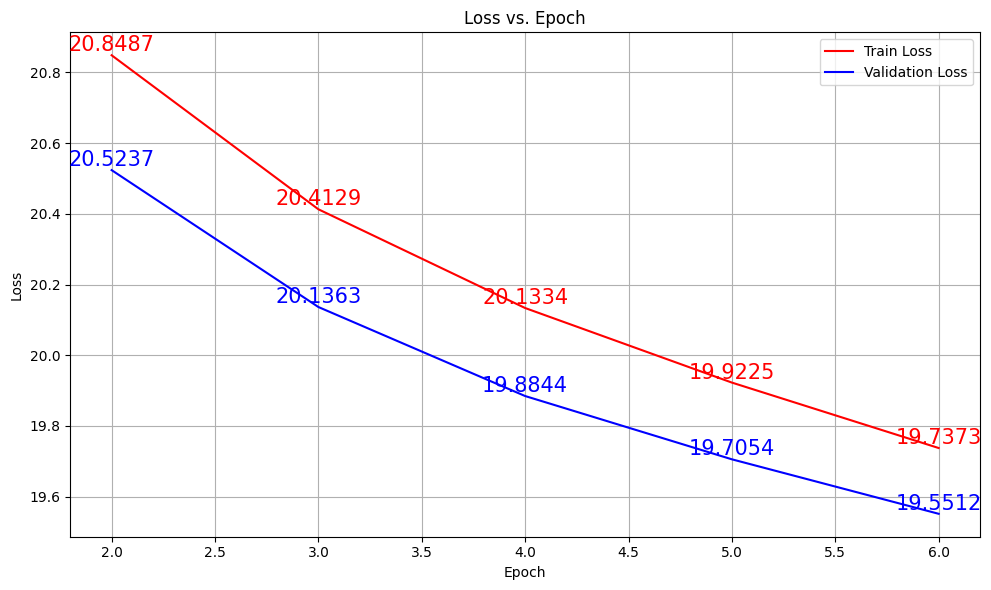

In [17]:
from datetime import datetime
import matplotlib.pyplot as plt



save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\loss_fig'

# ResNet50
# save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\resnet50_loss_fig'

# Vgg16
# save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\vgg16_loss_fig'


# 创建日期子目录
today_date = datetime.now().strftime("%Y-%m-%d")
save_dir = os.path.join(save_dir, today_date)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


############### 构建保存文件路径################
# 构建保存文件路径 : 依據不同的optimizer命名fig
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S") #確保每次存取都有唯一名，不要覆蓋上次存取的圖
save_path = os.path.join(save_dir, f'ResNet50_{resnet_weight}&VGG16_{vgg_weight}_SGD(lr=1e-3)_loss_fig_{timestamp}.png')
# save_path = os.path.join(save_dir, f'ResNet50_{resnet_weight}&VGG16_{vgg_weight}_with_Adam_loss_fig_{timestamp}.png')
# save_path = os.path.join(save_dir, f'ResNet50_SGD_{timestamp}.png')
# save_path = os.path.join(save_dir, f'Vgg16_SGD_{timestamp}.png')



# 截斷 train_loss_history 和 valid_loss_history 以使其長度相同 : 因為中間有Early_stop機制，會造成train_loss_history 和 valid_loss_history 的形狀不匹配使得圖出不來!
min_length = min(len(train_loss_history), len(valid_loss_history))

# 繪製损失隨 epoch 變化的曲线
plt.figure(figsize=(10, 6)) 
plt.plot(range(2, min_length + 2), train_loss_history, 'r-', label='Train Loss')
plt.plot(range(2, min_length + 2), valid_loss_history, 'b-', label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout() #自動調整圖的佈局，以確保軸標籤不被截斷


# 標示 y 座標數值
for i, loss in enumerate(train_loss_history[:min_length+1]):
    plt.text(i+2, loss, f'{loss:.4f}', fontsize=15, ha='center', va='bottom', color='red')

for i, loss in enumerate(valid_loss_history[:min_length+1]):
    plt.text(i+2, loss, f'{loss:.4f}', fontsize=15, ha='center', va='bottom', color='blue')


plt.savefig(save_path)
plt.show()

#圖不完整變成要手動存!


標數值在圖上

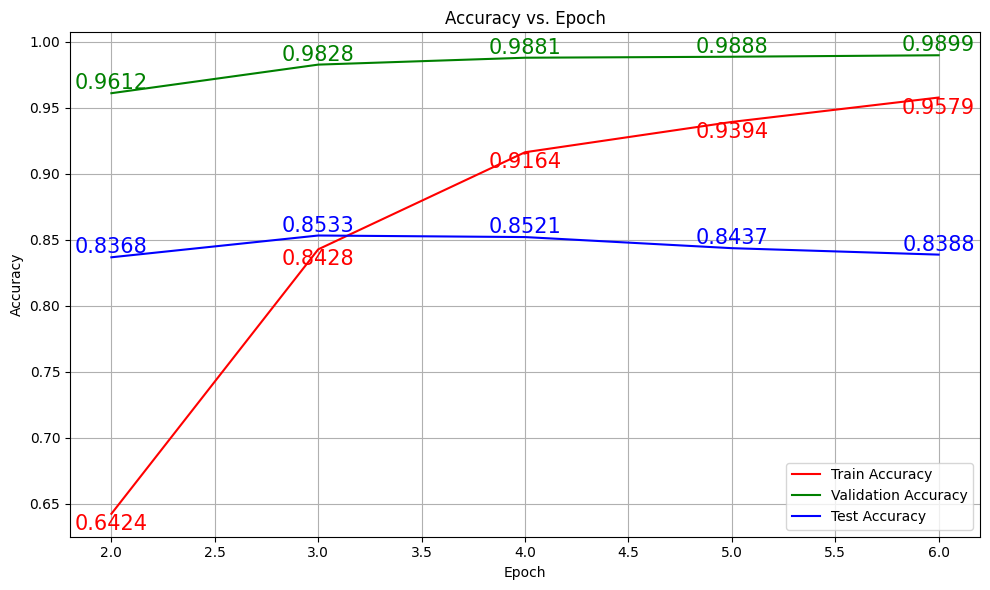

In [18]:
from datetime import datetime
import matplotlib.pyplot as plt



save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\acc_fig'
# save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\resnet50_acc_fig'
# save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\vgg16_acc_fig'


# Create a subdirectory for the current date
today_date = datetime.now().strftime("%Y-%m-%d")
save_dir = os.path.join(save_dir, today_date)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


# Build the save file path : 記得改檔名
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

save_path = os.path.join(save_dir, f'VGG16_ResNet50_SGD{timestamp}.png')

# save_path = os.path.join(save_dir, f'ResNet50_SGD_{timestamp}.png')


# save_path = os.path.join(save_dir, f'VGG16_SGD_{timestamp}.png')




# 截斷 train_loss_history 和 valid_loss_history 以使其長度相同 : 因為中間有Early_stop機制，造成train_loss_history 和 valid_loss_history 的形狀不匹配!
min_length = min(len(train_accuracy_history), len(valid_accuracy_history),len(test_accuracy_history))


# 繪製损失隨 epoch 變化的曲线
# Plot accuracy vs. epoch
plt.figure(figsize=(10, 6))  # 設置圖片尺寸為寬度10英寸，高度6英寸
plt.plot(range(2, min_length+2), train_accuracy_history,'r', label='Train Accuracy')
plt.plot(range(2, min_length+2), valid_accuracy_history,'g', label='Validation Accuracy')
plt.plot(range(2, min_length+2), test_accuracy_history,'b', label='Test Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right') #調整圖例位置
plt.grid(True)
plt.tight_layout() #自動調整圖的佈局，以確保軸標籤不被截斷


# 標示 y 座標數值
for i, acc in enumerate(train_accuracy_history[:min_length+1]):
    plt.text(i+2, acc, f'{acc:.4f}', fontsize=15, ha='center', va='top', color='red')  #注意數值位置改為top!

for i, acc in enumerate(valid_accuracy_history[:min_length+1]):
    plt.text(i+2, acc, f'{acc:.4f}', fontsize=15, ha='center', va='bottom', color='green')

for i, acc in enumerate(test_accuracy_history[:min_length+1]):
    plt.text(i+2, acc, f'{acc:.4f}', fontsize=15, ha='center', va='bottom', color='blue')




plt.savefig(save_path)
plt.show()



In [5]:
import sys
sys.path.append(r"E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\reqiured_funcs") #存取所需函式的路徑

import importlib,load_h5
# 確保加載最新版本
importlib.reload(load_h5)

<module 'load_h5' from 'E:\\OCT\\dental OCT\\bare tooth\\ensemble_model_aug\\code\\reqiured_funcs\\load_h5.py'>

In [6]:
import numpy as np

save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\hdf5'
file_name = 'test_data.h5'
batch_size = 3000  # 您可以根據需要調整批次大小
# date="2024-09-11"
date="2024-11-14"

# 創建數據加載器
data_loader = load_h5.HDF5DataLoader(save_dir, file_name,date,batch_size=batch_size)


# 假设你的数据是使用 PyTorch 的 DataLoader 进行加载
test_data = []
test_labels = []

# 遍歷數據
for i, (batch_data, batch_labels) in enumerate(data_loader):
    print(f"處理批次 {i + 1}/{len(data_loader)}") #class中有__len__才能使用len(data_loader)
    print(f"  數據形狀: {batch_data.shape}")
    print(f"  標籤形狀: {batch_labels.shape}")

       # 将每个批次的数据添加到列表中
    test_data.append(batch_data)
    test_labels.append(batch_labels)

# 将列表中的数据合并成一个张量(應用更全面)
test_data = np.concatenate(test_data, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

print(f"最終測試數據形狀: {test_data.shape}")
print(f"最終測試標籤形狀: {test_labels.shape}")

print("\n數據處理完成")

處理批次 1/2
  數據形狀: (3000, 224, 224, 3)
  標籤形狀: (3000, 1)
處理批次 2/2
  數據形狀: (2938, 224, 224, 3)
  標籤形狀: (2938, 1)
最終測試數據形狀: (5938, 224, 224, 3)
最終測試標籤形狀: (5938, 1)

數據處理完成


In [22]:
#%% 模型會根據提供的測試數據生成預測，這些預測結果存儲在 prediction 變數中

#單獨用resnet/vgg
# prediction = ResNet50_model.predict(test_data)
# prediction = VGG16_model.predict(test_data)

#%%load model : 從日期那邊微調路徑!
from keras.models import load_model

#OCTA
# model_path = r"E:/OCT/dental OCT/bare tooth/ensemble_model_aug/code/2024_8_13/best_results/2024-11-14/ensemble_ResNet50_VGG16_acc=0.8043.h5"
model_path = r"E:/OCT/dental OCT/bare tooth/ensemble_model_aug/code/2024_8_13/best_results/2024-11-17/ensemble_ResNet50_VGG16_acc=0.8424.h5"

# 載入模型最佳權重(選定test acc max)
ensemble_model = load_model(model_path)

#集成式模型
prediction = ensemble_model.predict([test_data,test_data])



In [ ]:
#%%plot model
from keras.utils import plot_model
plot_model(ensemble_model, to_file='model.png')  

In [ ]:
#region
# 主要的改進和錯誤修復包括：

# NaN 的可能原因：

# 混淆矩陣計算時分母為零
# 數據類型不一致
# 缺失值處理


# 改進措施：

# 加入了明確的錯誤處理
# 確保數據類型轉換
# 避免除以零的情況
# 確保混淆矩陣維度正確



# 使用下列改進後的代碼，你應該不會再遇到 NaN 的問題。如果仍然出現問題，建議檢查：

# 輸入數據是否包含缺失值
# prediction 和 test_labels 的形狀是否匹配
# 數據的值域是否在合理範圍內

#endregion

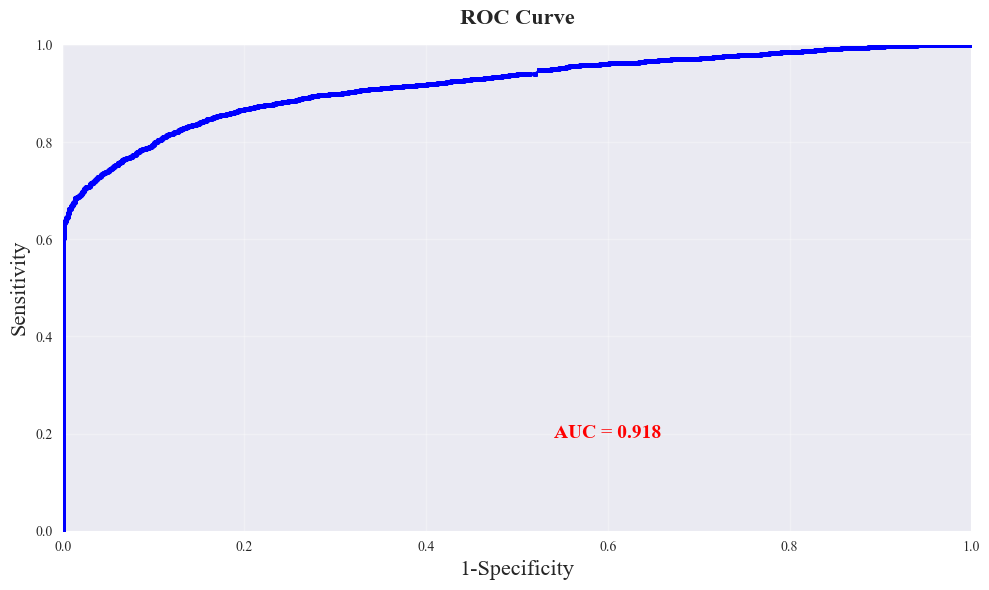

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, auc
import matplotlib.pyplot as plt
from datetime import datetime
import os

def calculate_roc_curves(predictions, test_labels):
    """
    計算多個模型的 ROC 曲線數據
    
    Args:
        predictions: 模型預測機率值 shape=(n_samples, n_classes)
        test_labels: 實際標籤 one-hot 編碼 shape=(n_samples, n_classes)
    
    Returns:
        specificities, sensitivities 列表
    """
    spe = []  # specificity
    sen = []  # sensitivity
    
    # 確保數據類型為 numpy array
    predictions = np.array(predictions)
    test_labels = np.array(test_labels)
    
    # 獲取真實標籤 (samples,classes)  故取axis = 1
    true_labels = np.argmax(test_labels, axis=1)
    
    # 記錄最佳閾值
    best_threshold = 0
    min_error = float('inf')
    
    # 對每個預測概率作為閾值進行計算
    sorted_indices = np.argsort(predictions[:, 1])
    
    for idx in sorted_indices:
        threshold = predictions[idx, 1]
        # 根據閾值進行分類
        predicted_labels = (predictions[:, 1] >= threshold).astype(int)
        
        # 計算混淆矩陣
        try:
            cm = confusion_matrix(true_labels, predicted_labels)
            
            # 確保混淆矩陣具有正確的維度
            if cm.shape != (2, 2):
                continue
                
            # 計算 specificity 和 sensitivity
            tn, fp, fn, tp = cm.ravel()
            
            # 避免除以零
            specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
            sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
            
            # 只有在計算結果有效時才添加到列表中  np.isnan過濾無效數值，以免影響結果
            if not (np.isnan(specificity) or np.isnan(sensitivity)):
                spe.append(specificity)
                sen.append(sensitivity)
                
                # 更新最佳閾值
                current_error = fp + fn
                #每次遇到更小的error，就更新為該值
                if current_error < min_error:
                    min_error = current_error
                    best_threshold = threshold
                    
        except ValueError as e:
            print(f"Warning: Error in confusion matrix calculation: {e}")
            continue
    
    # 添加起點和終點
    spe = np.array([1.0] + spe + [0.0])
    sen = np.array([0.0] + sen + [1.0])
    
    # 確保數據是排序的
    sort_idx = np.argsort(1 - spe)
    spe = spe[sort_idx]
    sen = sen[sort_idx]
    
    return spe, sen, best_threshold

def plot_roc_curve(specificities, sensitivities, save_path, model_name=""):
    """
    繪製 ROC 曲線
    """
    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn')
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["axes.titlepad"] = 15
    
    # 繪製 ROC 曲線
    plt.plot(1 - specificities, sensitivities, 'b.-', label=model_name)
    
    # 計算 AUC
    roc_auc = auc(1 - specificities, sensitivities)
    
    plt.title('ROC Curve', fontsize=16, fontweight='bold')
    plt.xlabel('1-Specificity', size=16)
    plt.ylabel('Sensitivity', size=16)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    
    # 添加 AUC 標註
    plt.text(0.6, 0.2, f'AUC = {roc_auc:.3f}', 
             fontsize=14, fontweight='bold', color='red',
             ha='center', va='center')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # 保存圖片
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return roc_auc

# 使用示例：
if __name__ == "__main__":
    # 創建保存目錄
    # 基礎路徑
    base_path = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13'
    save_dir = os.path.join(base_path, 'ROC')

    # 創建當前日期的子目錄
    today_date = datetime.now().strftime("%Y-%m-%d")
    save_dir = os.path.join(save_dir, today_date)
    os.makedirs(save_dir, exist_ok=True)
    
    # 計算 ROC 曲線數據
    spe, sen, threshold = calculate_roc_curves(prediction, test_labels)
    
    # 繪製並保存圖片
    save_path = os.path.join(save_dir, 
                            f'ROC_ResNet50_{resnet_weight}_VGG16_{vgg_weight}.png')
    auc_score = plot_roc_curve(spe, sen, save_path)

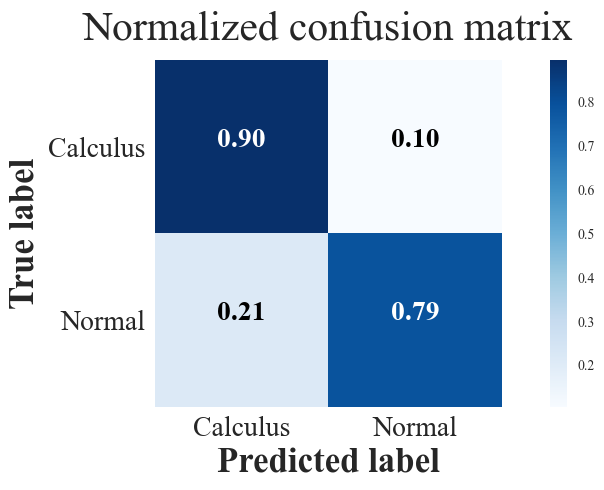

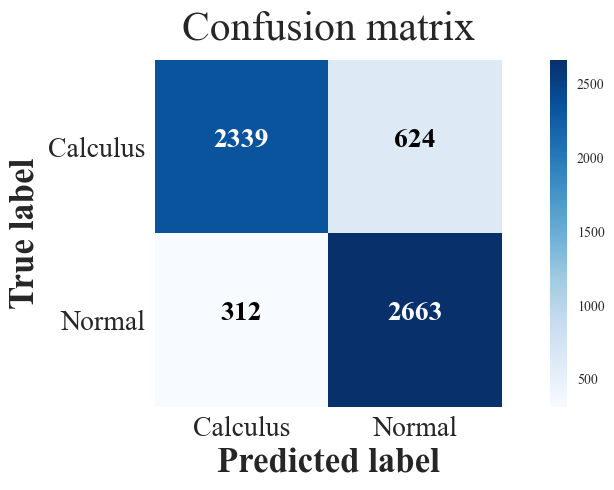

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os


# 假设 C 是您的混淆矩阵
p = np.argmax(prediction, axis=1)
t = np.argmax(test_labels, axis=1)

# 使用confusion_matrix函數生成混淆矩陣
C = confusion_matrix(t, p)  

# 直接交換元素位置
# 保存原始值
temp_11 = C[0,0]
temp_12 = C[0,1]
temp_21 = C[1,0]
temp_22 = C[1,1]

# 交換元素

#主對角線元素對調
C[0,0] = temp_22  # a22 -> a11
C[1,1] = temp_11  # a11 -> a22

#副對角線元素對調
C[0,1] = temp_21  # a21 -> a12
C[1,0] = temp_12  # a12 -> a21

# 按行進行歸一化（確保每行加總為1）
NC = C.astype('float') / C.sum(axis=1)[:, np.newaxis]


# 直接交換元素位置
# 保存原始值
temp_11 = NC[0,0]
temp_12 = NC[0,1]
temp_21 = NC[1,0]
temp_22 = NC[1,1]

# 交換元素

#主對角線元素對調
NC[0,0] = temp_22  # a22 -> a11
NC[1,1] = temp_11  # a11 -> a22

#副對角線元素對調
NC[0,1] = temp_21  # a21 -> a12
NC[1,0] = temp_12  # a12 -> a21


#存取路徑
save_dir = r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_8_13\confusion_M'

# Create a subdirectory for the current date
today_date = datetime.now().strftime("%Y-%m-%d")
save_dir = os.path.join(save_dir, today_date)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Build the save file path
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.path.join(save_dir, f'VGG16_SGD(1e-3)_normalized_{timestamp}.png')

# 绘制归一化混淆矩阵
plt.figure(figsize=(10, 5))
plt.imshow(NC, interpolation='nearest', cmap=plt.cm.Blues, extent=(-0.5, len(NC) - 0.5, len(NC) - 0.5, -0.5))
plt.title('Normalized confusion matrix', fontsize=30)
plt.colorbar()

#設置主標題
plt.xlabel('Predicted label', fontsize=25, fontweight='bold')
plt.ylabel('True label', fontsize=25, fontweight='bold')

# 設置x軸和y軸的刻度位置和標籤
positions = [0,1]  # 刻度位置
labels = ['Calculus', 'Normal']  # 對應標籤
plt.xticks(positions, labels, fontsize=20, rotation=0)
plt.yticks(positions, labels, fontsize=20)

plt.grid(False)

# 添加文本标签: 影響矩陣顯示的數值!
thresh = NC.max() / 2.
for i in range(len(NC)):
    for j in range(len(NC[0])):
        plt.text(j, i, format(NC[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if NC[i, j] > thresh else "black",
                fontsize=20,
                fontweight='bold')

plt.tight_layout()
plt.savefig(save_path)
plt.show()

# Build the save file path
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# save_path = os.path.join(save_dir, f'ResNet50_SGD(1e-3)_{timestamp}.png')
# save_path = os.path.join(save_dir, f'VGG16_SGD(1e-3)_{timestamp}.png')
# save_path = os.path.join(save_dir, f'ResNet50_{resnet_weight}_VGG16_{vgg_weight}_SGD(1e-3)_{timestamp}.png')
save_path = os.path.join(save_dir, f'ResNet50__VGG16_SGD(1e-3)_{timestamp}.png')

#檔名記得隨optimizer的不同，動態修改


# 绘制混淆矩阵
#plt.subplot(122)
plt.figure(figsize=(10, 5))
plt.imshow(C, interpolation='nearest', cmap=plt.cm.Blues, extent=(-0.5, len(C) - 0.5, len(C) - 0.5, -0.5))
plt.title('Confusion matrix',fontsize=30)
plt.colorbar()

#設置主標題
plt.xlabel('Predicted label',fontsize=25, fontweight='bold')
plt.ylabel('True label',fontsize=25, fontweight='bold')

# 設置x軸和y軸的刻度位置和標籤
positions = [0, 1]  # 刻度位置
labels = ['Calculus', 'Normal']  # 對應標籤
plt.xticks(positions, labels,fontsize=20,rotation=0)  # rotation=0 表示標籤水平顯示
plt.yticks(positions, labels,fontsize=20)

plt.grid(False)

# 添加文本标签(也就是cal nor 數量)到混淆矩阵
#一般是陽1st排，陰2nd排(但生成的反過來了)
thresh = C.max() / 2.
for i in range(len(C)):
    for j in range(len(C[0])):
        plt.text(j, i, format(C[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if C[i, j] > thresh else "black",
                 fontsize=20,  
                 fontweight='bold')

plt.tight_layout()
plt.savefig(save_path)
plt.show()


perplexity調小後，資料點較分散

In [ ]:
"""
1.加載圖像：從指定的文件夾中加載圖像，分別為 cal_folder 和 nor_folder。
2.確定圖像的真實標籤：通過文件夾的名稱來確定每張圖像的True Label，如果圖像位於 cal_folder 中，則將其標籤設置為 'cal'，如果位於 nor_folder 中，則將其標籤設置為 'nor'。
3.計算預測標籤：使用模型對測試數據進行預測，並根據預測結果獲取每個數據點的預測標籤。
4.生成 t-SNE 圖表：使用 t-SNE 對中間層輸出進行降維，然後根據真實標籤將數據分組，並在圖表中顯示各組的數據點。
5.顯示圖像與標籤：根據圖像的真實標籤，在 t-SNE 圖表中對應的數據點上顯示相應的圖像和標籤。
6.將 t-SNE 圖表轉換為 HTML：將生成的 t-SNE 圖表轉換為 HTML 字符串。
7.保存 HTML 文件：將生成的 HTML 字符串保存為 HTML 文件。"""

True label:看圖 Predicted label: 看資料點

chatgpt下指令突破點:
現在你知道真實影像的來源，那請幫我在combined_labels = [f'{tooltips[i]}<br>True Label: {true_labels_group[i]}<br>Predicted Label: {layer_output_label_predict[i]}' for i in range(len(group))] 這段，針對真實影像顯示出正確的<br>True Label: {true_labels_group[i]}，若影像是來自於cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\cal' ，<br>True Label: {true_labels_group[i]} 要顯示cal，若影像是來自於cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\nor' ，<br>True Label: {true_labels_group[i]} 要顯示nor


最新改版:試試看  解決資料點跟Predicted label的矛盾，但實際影像為cal，應該設定為True label:cal  True 
label要跟oct影像互相對應! 差此步->成功!

先把test folder中的npy檔轉為png，tSNE才能匯入圖片

In [ ]:
from cvt_to_png import cvt_to_png

src_folder=r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test'
png_folder=r'E:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test_png'


cvt_to_png(src_folder,png_folder)